# Analyzing 2020 Citibike Data

As part of our project, "Analyzing the Relationships between Car Accidents and Public Transportation in NYC," we decided to look at CitiBike's data to see if we see any relationship between where the most used CitiBike stations are located and the prevalence of motor vehicle accidents within the vicinity of the station. 

### Questions to Ask 

- Where do Citibikers ride to?
- When do they ride? What days/hours/months are the most popular for usage?
- How far do Citibikes go?
- Which stations are the most popular?

### Process Outline

- Merge CitiBike monthly files into csv files grouped by year for easier manipulation
- Conduct Seasonality Analysis for ridership
- Conduct Demographic Analysis for ridership
- Conduct Spatial Analysis to see which stations are the most popular

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
%matplotlib inline
sns.set()

#import 2020 data
frame = pd.read_csv('frame_2020.csv')
frame.sample(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,birth year,gender,starttimemonth,starttimeweekday,starttimehour,starttimeyear
13224547,12.767,2020-09-17 08:48:42.357,2020-09-17 09:01:28.836,546.0,E 30 St & Park Ave S,40.744449,-73.983035,237.0,E 11 St & 2 Ave,40.730473,-73.986724,15648,1998,2,9,3,8,2020
1308695,6.033,2020-02-03 07:58:16.933,2020-02-03 08:04:19.071,3648.0,Flushing Ave & Vanderbilt Ave,40.697950,-73.970776,418.0,Front St & Gold St,40.702240,-73.982578,40385,1992,2,2,0,7,2020
12073926,3.100,2020-09-03 11:29:20.079,2020-09-03 11:32:26.648,442.0,W 27 St & 7 Ave,40.746647,-73.993915,490.0,8 Ave & W 33 St,40.751551,-73.993934,25014,1978,1,9,3,11,2020
12818345,14.200,2020-09-12 14:03:47.541,2020-09-12 14:18:00.244,525.0,W 34 St & 11 Ave,40.755942,-74.002116,405.0,Washington St & Gansevoort St,40.739323,-74.008119,39788,1970,2,9,5,14,2020
12273995,41.750,2020-09-05 17:45:27.793,2020-09-05 18:27:12.836,497.0,E 17 St & Broadway,40.737050,-73.990093,3152.0,3 Ave & E 71 St,40.768737,-73.961199,47176,1964,1,9,5,17,2020
1667358,1.433,2020-02-12 09:15:44.686,2020-02-12 09:17:11.110,3623.0,W 120 St & Claremont Ave,40.810949,-73.963400,3536.0,W 116 St & Broadway,40.808200,-73.964100,41725,1983,1,2,2,9,2020
12804636,14.767,2020-09-12 12:24:21.730,2020-09-12 12:39:08.518,298.0,3 Ave & Schermerhorn St,40.686832,-73.979677,2000.0,Front St & Washington St,40.702551,-73.989402,28581,1992,1,9,5,12,2020
11485282,24.067,2020-08-26 17:16:50.738,2020-08-26 17:40:55.240,3804.0,Front St & Jay St,40.702461,-73.986842,3587.0,Carroll St & Washington Ave,40.668674,-73.961815,31941,1986,2,8,2,17,2020
14515316,12.050,2020-10-02 15:36:05.730,2020-10-02 15:48:09.167,229.0,Great Jones St,40.727434,-73.993790,486.0,Broadway & W 29 St,40.746201,-73.988557,37180,1960,1,10,4,15,2020
11539703,15.483,2020-08-27 11:32:34.539,2020-08-27 11:48:04.506,3409.0,Bergen St & Smith St,40.686744,-73.990632,3576.0,Park Pl & Vanderbilt Ave,40.676700,-73.969024,27938,1985,1,8,3,11,2020


In [2]:
#examine the data types of the 2020 dataset
frame.dtypes

tripduration               float64
starttime                   object
stoptime                    object
start station id           float64
start station name          object
start station latitude     float64
start station longitude    float64
end station id             float64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
birth year                   int64
gender                       int64
starttimemonth               int64
starttimeweekday             int64
starttimehour                int64
starttimeyear                int64
dtype: object

In [3]:
#convert columns to correct datatypes
frame['start station name'] = frame['start station name'].astype('category')
frame['start station id'] = frame['start station id'].astype('category')
frame['end station id'] = frame['end station id'].astype('category')
frame['end station name'] = frame['end station name'].astype('category')

#convert the starttime and stoptime columns to datetime
frame['starttime'] = pd.to_datetime(frame['starttime'])
frame['stoptime'] = pd.to_datetime(frame['stoptime'])

## Seasonal Trend Analysis

Aim to see if there are any trends in seasonality.

In [4]:
#create groupby object to see rides by month
monthly_rides = frame.groupby(['starttimemonth']).size()

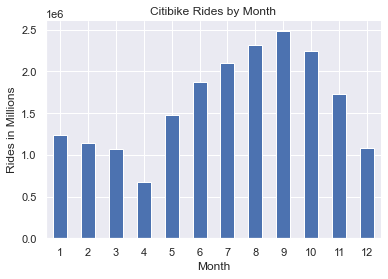

In [5]:
#plot monthly rides
ax = monthly_rides.plot(kind='bar', 
                   title='Citibike Rides by Month', 
                   rot=0)

ax.set_xlabel("Month")
ax.set_ylabel("Rides in Millions")

#hide top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

The months with the lowest ridership on Citibike are generally the winter months. However, due to the beginning of the COVID-19 lockdown, the lowest month was April. Peak months of ridership are August and September.

In [6]:
#create groupby object to see rides by weekday
weekday_rides = frame.groupby(['starttimeweekday']).size()

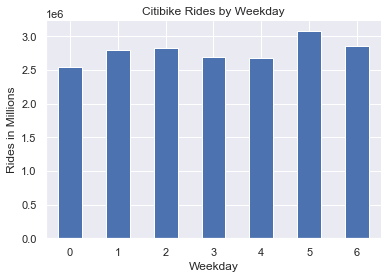

In [7]:
#plot the weekly rides
ax = weekday_rides.plot(kind='bar', 
                   title='Citibike Rides by Weekday', 
                   rot=0)

ax.set_xlabel("Weekday")
ax.set_ylabel("Rides in Millions")

#hide top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Sunday as denoted as 0 is the day with the lowest number of rides. Friday as denoted as 5 is the day with the most rides. 

Now let's look at hours.

In [8]:
#create groupby object to see rides by the hour
ride_hours = frame.groupby(['starttimehour']).size()

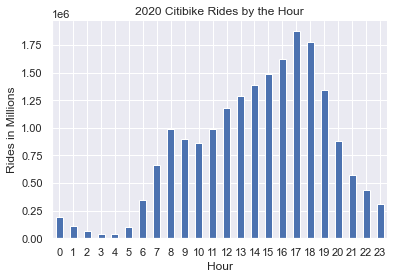

In [9]:
ax = ride_hours.plot(kind='bar', 
                   title='2020 Citibike Rides by the Hour', 
                   rot=0)

ax.set_xlabel("Hour")
ax.set_ylabel("Rides in Millions")

#hide top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Here we see that 4 AM is the hour with the least amount of rides. The peak time is 5 PM, which aligns with the usual commuter time back home. 

Given that Friday and Saturday are the days with the most rides, I would like to examine these days and analyze the hourly trends.

In [10]:
day_hour_rides = frame.groupby(['starttimeweekday','starttimehour']).size()
friday_rides = day_hour_rides[5]
saturday_rides = day_hour_rides[6]

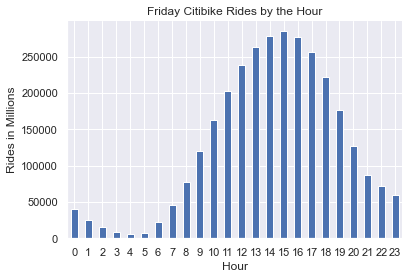

In [11]:
ax = friday_rides.plot(kind='bar', 
                   title='Friday Citibike Rides by the Hour', 
                   rot=0)

ax.set_xlabel("Hour")
ax.set_ylabel("Rides in Millions")

#hide top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

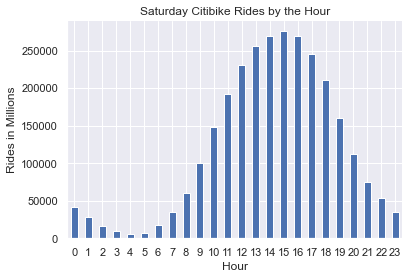

In [12]:
ax = saturday_rides.plot(kind='bar', 
                   title='Saturday Citibike Rides by the Hour', 
                   rot=0)

ax.set_xlabel("Hour")
ax.set_ylabel("Rides in Millions")

#hide top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Analyzing Demographics

- What genders and age use Citibike the most?

Citibike categories their customers' genders as such:
   - 0 = Unknown
   - 1 = Male
   - 2 = Female

In [13]:
frame['gender'].value_counts().sort_values(ascending=False)

1    11779719
2     5538542
0     2137357
Name: gender, dtype: int64

In [14]:
frame['birth year'].value_counts().sort_values(ascending=False)

1969    2196377
1990     921607
1991     810662
1992     801772
1989     793908
         ...   
1905          8
1926          6
1925          4
1892          2
1879          1
Name: birth year, Length: 118, dtype: int64

In [15]:
print(frame['birth year'].min())
print(frame['birth year'].max())

1873
2004


## Spatial Analysis

Aim to analyze the expansion of stations and the stations where rides start the most.

In [16]:
#obtain the latitude and longitude for stations
latlongs = list(set(list(zip(frame['start station latitude'], frame['start station longitude']))))

In [17]:
#2020 locations
from folium import plugins
from folium.plugins import HeatMapWithTime

#mapping where trips start 
ny_coords = [40.738, -73.98]
folium_map = folium.Map(location=ny_coords, zoom_start=13, tiles="CartoDB dark_matter")


for lat,log in latlongs:
        folium.features.CircleMarker(
            [lat, log],
            radius=3,
            color='red',
            fill=True,
            fill_color='darkred',
            fill_opacity=0.6).add_to(folium_map)

folium_map

In [18]:
folium_map.save("locations_2020.html")

In [19]:
location_rides = frame.groupby(['start station latitude','start station longitude']).size().reset_index()
location_rides = location_rides.rename(columns={0:'Rides'})
location_rides

,start station latitude,start station longitude,Rides
0,40.655400,-74.010628,6487
1,40.656000,-74.010000,1
2,40.657089,-74.008702,8928
3,40.661063,-73.979453,48504
4,40.662000,-73.980000,1
...,...,...,...
1470,40.848467,-73.936064,2316
1471,40.849250,-73.930220,1646
1472,40.849972,-73.938423,3048
1473,40.851680,-73.941860,2443


In [20]:
location_rides_zip = zip(location_rides['start station latitude'],location_rides['start station longitude'], location_rides['Rides'])

hm_layer = HeatMap(list(location_rides_zip),
                   min_opacity=0.2,
                   radius=8,
                   blur=6, 
                 )

In [21]:
#heatmap of where most rides start in 2019
ny_coords = [40.738, -73.98]
folium_hmap = folium.Map(location=ny_coords, zoom_start=13, tiles="CartoDB dark_matter")


folium_hmap.add_child(hm_layer)
folium_hmap


In [22]:
folium_hmap.save("hmap_2020.html")

In [23]:
#most popular start stations for rides
frame['start station name'].value_counts().sort_values(ascending=False).head(10)

1 Ave & E 68 St                  100639
West St & Chambers St             99158
W 21 St & 6 Ave                   99098
12 Ave & W 40 St                  97229
Broadway & W 60 St                91606
E 17 St & Broadway                89881
E 13 St & Avenue A                84536
Christopher St & Greenwich St     84415
Pier 40 - Hudson River Park       79675
Broadway & E 22 St                78169
Name: start station name, dtype: int64

In [27]:
location1 = frame[['start station name','start station latitude','start station longitude']].drop_duplicates()

location1.to_csv (r'C:\Users\nicol\Documents\DS4A\Group Project\Citibike Data\citibike_locations_2020.csv', index = False, header=True)